In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import oandapyV20
from oandapyV20 import API
import os

In [31]:
# Load access token from .env file
from dotenv import load_dotenv
load_dotenv()

access_token = os.getenv("OANDA_ACCESS_TOKEN")
account_id = os.getenv("OANDA_ACCOUNT_ID")

# Create an instance of the API class
api = API(access_token=access_token)

In [32]:
data = pd.read_csv('./DJIA_TA.csv', sep=',')
data["NextDayPrice"] = data["Close"].shift(-1)
data = data.drop(columns=['Open', 'High', 'Low', 'Adj Close**'])
data.fillna(0, inplace=True)

# Scale the data between 0 and 1 except the date and the next day price
scaler = MinMaxScaler()
data[data.columns[1:-1]] = scaler.fit_transform(data[data.columns[1:-1]])


In [34]:
# X and y, dependent and independent variables
X = data[['momentum_ppo','momentum_ppo_signal','trend_macd','trend_macd_signal']]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y.values.ravel(), test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r_squared)

Root Mean Squared Error (RMSE): 3864.3506365396743
R-squared (R²): 0.10181504928648688


In [ ]:
# Sort highest and  lowest model coefficients by their absolute value and their corresponding features index
# coef = pd.DataFrame(model.coef_, X.columns, columns=['Coeff'])
# coef['Abs'] = coef['Coeff'].abs()
# coef = coef.sort_values(by=['Abs'], ascending=False)
# print(coef.head(10))

In [25]:
data.head()

,Date,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,...,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,NextDayPrice
0,2023-09-25,0.846616,0.172684,0.080495,0.974112,0.391314,0.529018,0.339346,0.350725,0.594107,...,0.39894,0.289057,0.59126,0.58212,0.509782,0.0,0.889949,0.437465,0.846616,33963.84
1,2023-09-22,0.844252,0.220054,0.073148,0.966617,0.391314,0.529018,0.360036,0.350725,0.592472,...,0.39894,0.289057,0.59126,0.58212,0.509782,0.0,0.402329,0.432318,0.844252,34070.42
2,2023-09-21,0.850106,0.296178,0.063149,0.975874,0.391314,0.529018,0.367361,0.350725,0.467438,...,0.39894,0.289057,0.59126,0.58212,0.509782,0.0,0.419908,0.450198,0.850106,34440.88
3,2023-09-20,0.870452,0.247638,0.054036,0.984007,0.391314,0.529018,0.418458,0.350725,0.483884,...,0.39894,0.289057,0.59126,0.58212,0.509782,0.0,0.450786,0.481416,0.870452,34517.73
4,2023-09-19,0.874673,0.237010,0.058094,0.991895,0.391314,0.529018,0.312783,0.350725,0.481961,...,0.39894,0.289057,0.59126,0.58212,0.509782,0.0,0.416288,0.446523,0.874673,34624.30


<Axes: >

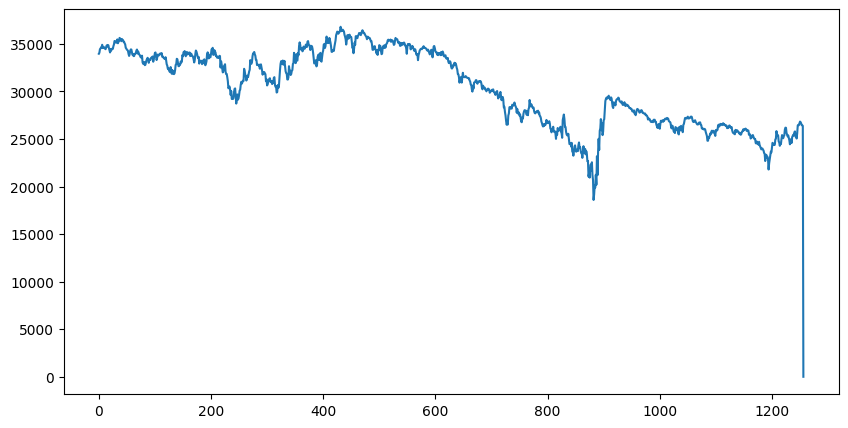

In [28]:
data.NextDayPrice.plot(figsize=(10, 5))